# 1-WL Equivalent Graph Pairs Dataset — Demo

This notebook demonstrates the **1-WL Equivalent Graph Pairs Dataset**: a curated collection of non-isomorphic graph pairs that are provably indistinguishable by the 1-dimensional Weisfeiler-Leman (1-WL) graph isomorphism test.

**What this dataset contains:**
- **9 graph pairs** across 4 families: SRG(16,6,2,2), SRG(25,12,5,6), SRG(26,10,3,4), and CSL(41,R)
- Each pair consists of two **non-isomorphic** graphs that are **cospectral** and **1-WL equivalent**
- Full adjacency matrices, edge lists, eigenvalues (adjacency + Laplacian), and degree sequences
- Verification metadata confirming non-isomorphism and 1-WL equivalence

**Purpose:** Testing expressiveness of graph distinguishing methods beyond the 1-WL test.

In [1]:
import subprocess, sys
def _pip(*a): subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', *a])

# All packages used (numpy, matplotlib, networkx) are pre-installed on Colab
# Install locally only to match Colab env
if 'google.colab' not in sys.modules:
    _pip('numpy==2.0.2', 'matplotlib==3.10.0', 'networkx==3.6.1')


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


## Imports

In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Data Loading

Load the mini demo dataset from GitHub (with local fallback).

In [3]:
GITHUB_DATA_URL = "https://raw.githubusercontent.com/AMGrobelnik/ai-invention-7ff1bb-nonlinear-diffusion-signatures-breaking-/main/dataset_iter1_1_wl_equivalent/demo/mini_demo_data.json"

def load_data():
    try:
        import urllib.request
        with urllib.request.urlopen(GITHUB_DATA_URL) as response:
            return json.loads(response.read().decode())
    except Exception: pass
    if os.path.exists("mini_demo_data.json"):
        with open("mini_demo_data.json") as f: return json.load(f)
    raise FileNotFoundError("Could not load mini_demo_data.json")

In [4]:
data = load_data()
print(f"Dataset: {data['datasets'][0]['dataset']}")
print(f"Number of graph pairs: {len(data['datasets'][0]['examples'])}")
print(f"Categories: {data['metadata']['categories']}")

Dataset: 1wl_equivalent_graph_pairs
Number of graph pairs: 4
Categories: ['srg_16_6_2_2', 'srg_25_12_5_6', 'srg_26_10_3_4', 'csl_41']


## Configuration

Tunable parameters for the demo. `MAX_PAIRS` controls how many graph pairs to process and visualize.

In [5]:
# --- Config ---
# Maximum number of graph pairs to process/visualize
MAX_PAIRS = 4  # all pairs in mini dataset (full dataset has 9)

## Parse Graph Pairs

Extract graph pair data from JSON-encoded input strings, following the original `data.py` schema.

In [6]:
examples = data["datasets"][0]["examples"][:MAX_PAIRS]

parsed_pairs = []
for ex in examples:
    inp = json.loads(ex["input"])
    parsed_pairs.append({
        "pair_id": inp["pair_id"],
        "category": inp["category"],
        "graph_a": inp["graph_a"],
        "graph_b": inp["graph_b"],
        "output": ex["output"],
        "metadata_is_cospectral": ex["metadata_is_cospectral"],
        "metadata_wl1_equivalent": ex["metadata_wl1_equivalent"],
    })
    print(f"Pair: {inp['pair_id']}  |  Category: {inp['category']}  |  "
          f"Nodes: {inp['graph_a']['num_nodes']}  |  "
          f"Label: {ex['output']}")

print(f"\nTotal pairs parsed: {len(parsed_pairs)}")

Pair: srg16_rook_vs_shrikhande  |  Category: srg_16_6_2_2  |  Nodes: 16  |  Label: non-isomorphic
Pair: srg25_paulus_g1_vs_g2  |  Category: srg_25_12_5_6  |  Nodes: 25  |  Label: non-isomorphic
Pair: srg26_paulus_g1_vs_g2  |  Category: srg_26_10_3_4  |  Nodes: 26  |  Label: non-isomorphic
Pair: csl41_skip2_vs_skip3  |  Category: csl_41  |  Nodes: 41  |  Label: non-isomorphic

Total pairs parsed: 4


## Verify 1-WL Equivalence Properties

For each pair, confirm that the graphs share identical degree sequences, eigenvalue spectra, and edge counts — the hallmarks of 1-WL equivalent (cospectral) graph pairs.

In [7]:
for pair in parsed_pairs:
    ga, gb = pair["graph_a"], pair["graph_b"]
    print(f"=== {pair['pair_id']} ({pair['category']}) ===")
    print(f"  Graph A: {ga['name']}  |  Nodes: {ga['num_nodes']}  |  Edges: {ga['num_edges']}")
    print(f"  Graph B: {gb['name']}  |  Nodes: {gb['num_nodes']}  |  Edges: {gb['num_edges']}")

    # Check degree sequence equality
    deg_equal = sorted(ga["degree_sequence"]) == sorted(gb["degree_sequence"])
    print(f"  Degree sequences equal: {deg_equal}")

    # Check adjacency eigenvalue equality (cospectral)
    eigs_a = sorted(ga["adjacency_eigenvalues"])
    eigs_b = sorted(gb["adjacency_eigenvalues"])
    cospectral = np.allclose(eigs_a, eigs_b, atol=1e-6)
    print(f"  Cospectral (adj. eigenvalues): {cospectral}")

    # Check Laplacian eigenvalue equality
    lap_a = sorted(ga["laplacian_eigenvalues"])
    lap_b = sorted(gb["laplacian_eigenvalues"])
    lap_cospectral = np.allclose(lap_a, lap_b, atol=1e-6)
    print(f"  Cospectral (Laplacian):        {lap_cospectral}")

    # Metadata verification
    print(f"  1-WL equivalent (verified):    {pair['metadata_wl1_equivalent']}")
    print(f"  Non-isomorphic (ground truth): {pair['output']}")
    print()

=== srg16_rook_vs_shrikhande (srg_16_6_2_2) ===
  Graph A: Rook_4x4  |  Nodes: 16  |  Edges: 48
  Graph B: Shrikhande  |  Nodes: 16  |  Edges: 48
  Degree sequences equal: True
  Cospectral (adj. eigenvalues): True
  Cospectral (Laplacian):        True
  1-WL equivalent (verified):    True
  Non-isomorphic (ground truth): non-isomorphic

=== srg25_paulus_g1_vs_g2 (srg_25_12_5_6) ===
  Graph A: Paulus25_graph1  |  Nodes: 25  |  Edges: 150
  Graph B: Paulus25_graph2  |  Nodes: 25  |  Edges: 150
  Degree sequences equal: True
  Cospectral (adj. eigenvalues): True
  Cospectral (Laplacian):        True
  1-WL equivalent (verified):    True
  Non-isomorphic (ground truth): non-isomorphic

=== srg26_paulus_g1_vs_g2 (srg_26_10_3_4) ===
  Graph A: Paulus26_graph1  |  Nodes: 26  |  Edges: 130
  Graph B: Paulus26_graph2  |  Nodes: 26  |  Edges: 130
  Degree sequences equal: True
  Cospectral (adj. eigenvalues): True
  Cospectral (Laplacian):        True
  1-WL equivalent (verified):    True
  Non

## Summary Table

Overview of all processed graph pairs with key properties.

In [8]:
# Print summary table
header = f"{'Pair ID':<35} {'Category':<18} {'Nodes':>5} {'Edges':>5} {'Cospectral':>10} {'1-WL Eq':>7}"
print(header)
print("-" * len(header))
for pair in parsed_pairs:
    ga = pair["graph_a"]
    eigs_a = sorted(ga["adjacency_eigenvalues"])
    eigs_b = sorted(pair["graph_b"]["adjacency_eigenvalues"])
    cospec = np.allclose(eigs_a, eigs_b, atol=1e-6)
    print(f"{pair['pair_id']:<35} {pair['category']:<18} {ga['num_nodes']:>5} {ga['num_edges']:>5} {str(cospec):>10} {str(pair['metadata_wl1_equivalent']):>7}")

Pair ID                             Category           Nodes Edges Cospectral 1-WL Eq
-------------------------------------------------------------------------------------
srg16_rook_vs_shrikhande            srg_16_6_2_2          16    48       True    True
srg25_paulus_g1_vs_g2               srg_25_12_5_6         25   150       True    True
srg26_paulus_g1_vs_g2               srg_26_10_3_4         26   130       True    True
csl41_skip2_vs_skip3                csl_41                41    82      False    True


## Visualization

**Left column:** Side-by-side adjacency matrices for each graph pair — despite being non-isomorphic, their structure looks visually similar.

**Right column:** Overlaid eigenvalue spectra (adjacency matrix) — identical spectra confirm cospectrality, meaning 1-WL cannot distinguish them.

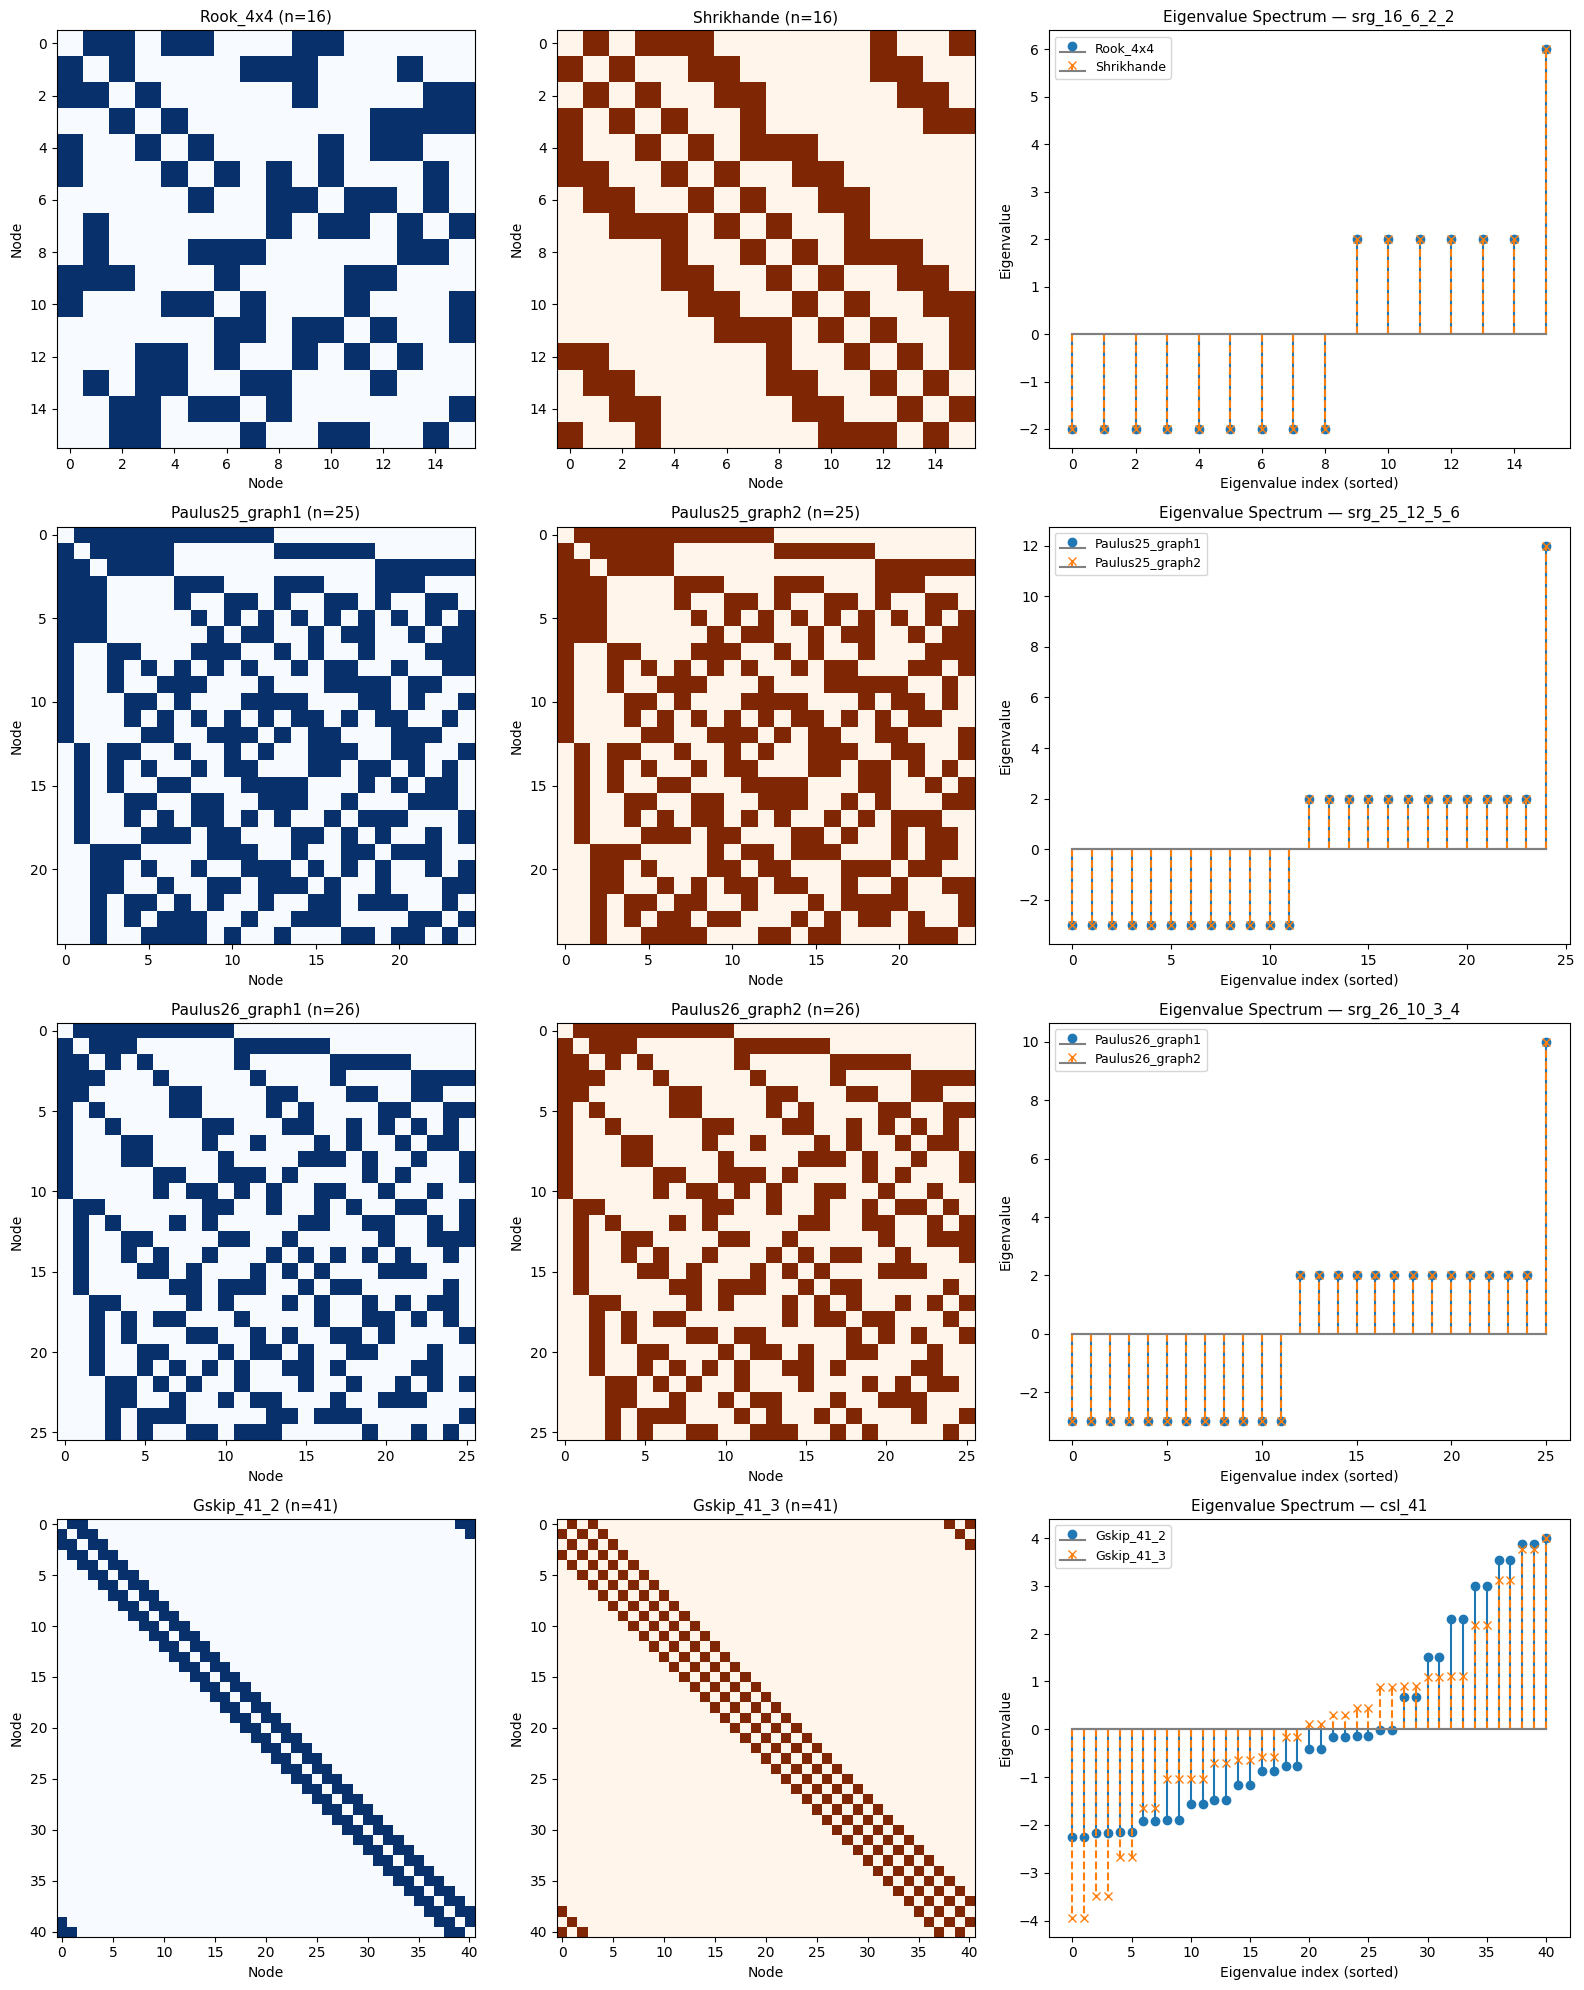

Saved: graph_pairs_visualization.png


In [9]:
fig, axes = plt.subplots(len(parsed_pairs), 3, figsize=(16, 5 * len(parsed_pairs)),
                         gridspec_kw={"width_ratios": [1, 1, 1.2]})
if len(parsed_pairs) == 1:
    axes = axes.reshape(1, -1)

for i, pair in enumerate(parsed_pairs):
    ga, gb = pair["graph_a"], pair["graph_b"]
    adj_a = np.array(ga["adjacency_matrix"])
    adj_b = np.array(gb["adjacency_matrix"])

    # Adjacency matrix A
    axes[i, 0].imshow(adj_a, cmap="Blues", interpolation="nearest")
    axes[i, 0].set_title(f"{ga['name']} (n={ga['num_nodes']})", fontsize=11)
    axes[i, 0].set_xlabel("Node")
    axes[i, 0].set_ylabel("Node")

    # Adjacency matrix B
    axes[i, 1].imshow(adj_b, cmap="Oranges", interpolation="nearest")
    axes[i, 1].set_title(f"{gb['name']} (n={gb['num_nodes']})", fontsize=11)
    axes[i, 1].set_xlabel("Node")
    axes[i, 1].set_ylabel("Node")

    # Eigenvalue spectra overlay
    eigs_a = sorted(ga["adjacency_eigenvalues"])
    eigs_b = sorted(gb["adjacency_eigenvalues"])
    axes[i, 2].stem(range(len(eigs_a)), eigs_a, linefmt="C0-", markerfmt="C0o",
                    basefmt="gray", label=ga["name"])
    axes[i, 2].stem(range(len(eigs_b)), eigs_b, linefmt="C1--", markerfmt="C1x",
                    basefmt="gray", label=gb["name"])
    axes[i, 2].set_title(f"Eigenvalue Spectrum — {pair['category']}", fontsize=11)
    axes[i, 2].set_xlabel("Eigenvalue index (sorted)")
    axes[i, 2].set_ylabel("Eigenvalue")
    axes[i, 2].legend(fontsize=9)

plt.tight_layout()
plt.savefig("graph_pairs_visualization.png", dpi=120, bbox_inches="tight")
plt.show()
print("Saved: graph_pairs_visualization.png")